In [66]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
lattice = np.random.binomial(1, 0.01, (21,21,21))

In [158]:
lattice_l = 21
number_of_spins = int(0.01 * lattice_l ** 3)

gamma_s = 2 * 1.76 * 10 ** 7
gamma_n = 6.73 * 10 ** 3
plank = 1.05 * 10 ** (-27)
a = 1.78 * 10 ** (-8)
const = gamma_s * gamma_n * plank ** 2 / a **3

discr = 10 ** 20
time_range = 10 ** 22
time = [i * discr for i in range(int(time_range / discr))]
aver_F = np.array([0. for _ in range(int(time_range / discr))])

num_conditions = 500
for instance in tqdm(range(num_conditions)):
    spins = []
    for k in range(number_of_spins):
        spins.append([np.random.randint(0, 20), np.random.randint(0, 20), np.random.randint(0, 20)])
        
    F = [1 for _ in range(int(time_range / discr))]
    A_spin = []

    for spin in spins:
        if ((spin[0] != 10) or (spin[1] != 10) or (spin[2] != 10)):
            r_spin = np.sqrt(np.array([(10 - spin[i]) ** 2 for i in range(len(spin))]).sum())
            cos_spin = (10 - spin[2]) / r_spin
            A_spin.append(const * np.sqrt(3 * cos_spin ** 2 + 1) / r_spin ** 3)

    for t in range(int(time_range / discr)):
        for A in A_spin:
            F[t] *= np.cos(A / 2 * t * discr)
    
    F = np.array(F)
    aver_F += F

100%|██████████| 500/500 [00:28<00:00, 17.51it/s]


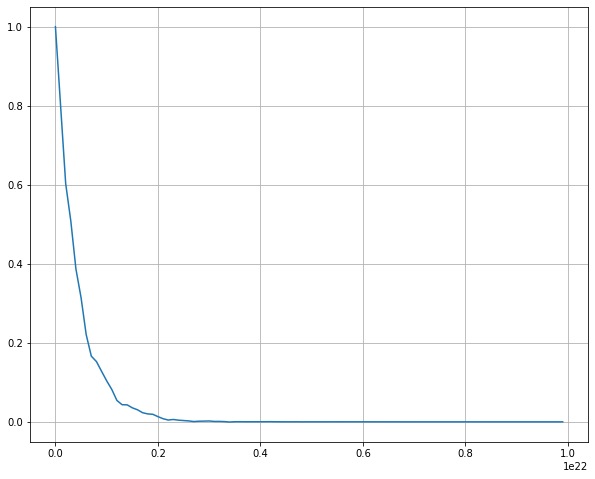

In [159]:
# aver_F = np.array(aver_F)
fig = plt.figure(figsize=(10,8))
plt.plot(time, aver_F / aver_F[0])
plt.grid()

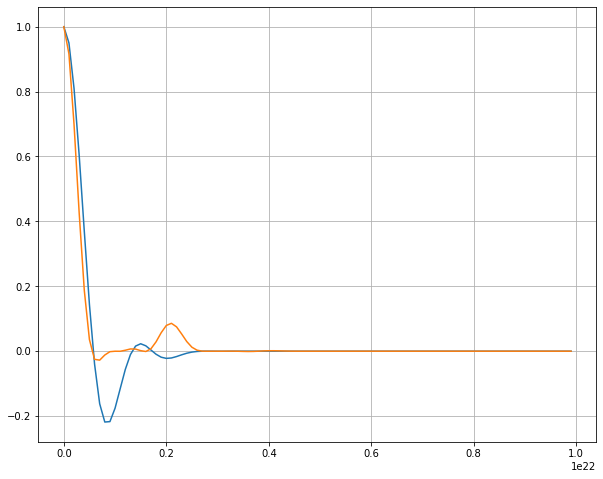

In [157]:
fig = plt.figure(figsize=(10,8))
plt.plot(time, aver_F)
plt.plot(time, aver_F_2)
plt.grid()